In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from siphon.simplewebservice.ndbc import NDBC

%matplotlib inline

In [3]:
df = NDBC.latest_observations()
df.tail()

,station,latitude,longitude,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,3hr_pressure_tendency,air_temperature,water_temperature,dewpoint,visibility,water_level_above_mean,time
766,YABP4,18.055,-65.833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.2,NaN,22.3,NaN,NaN,2019-04-01 15:54:00+00:00
767,YATA2,59.548,-139.733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1029.3,-1.0,NaN,6.8,NaN,NaN,NaN,2019-04-01 16:00:00+00:00
768,YKRV2,37.251,-76.342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1028.3,NaN,4.1,NaN,NaN,NaN,NaN,2019-04-01 15:54:00+00:00
769,YKTV2,37.227,-76.479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1027.6,NaN,4.0,10.6,NaN,NaN,NaN,2019-04-01 15:54:00+00:00
770,YRSV2,37.414,-76.712,330.0,2.1,NaN,NaN,NaN,NaN,NaN,1029.0,NaN,5.1,NaN,-7.4,NaN,NaN,2019-04-01 15:30:00+00:00


In [4]:
df.dropna(subset=['water_temperature'], inplace=True)

In [5]:
proj = ccrs.LambertConformal(central_latitude=45, central_longitude=-100,
                             standard_parallels=[30, 60])

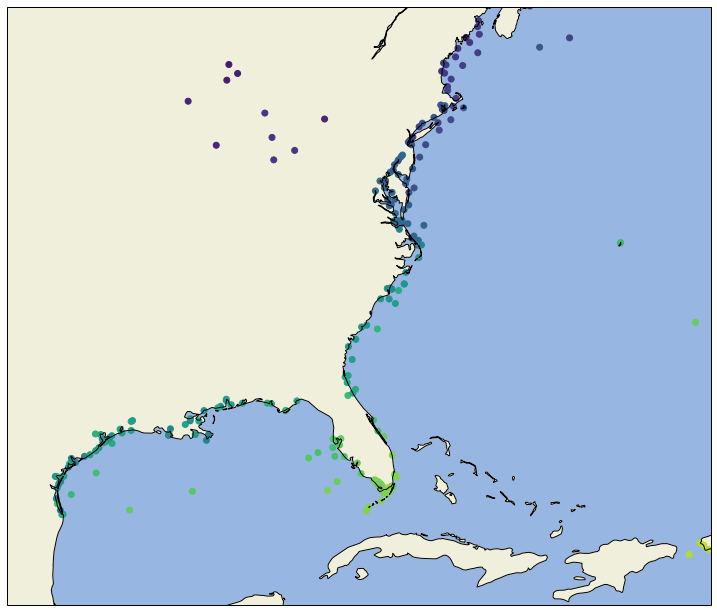

In [8]:
fig = plt.figure(figsize=(17,11))
ax = plt.axes(projection=proj)
ax.coastlines('50m', edgecolor='black')
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.set_extent([-100, -65, 22, 45], ccrs.PlateCarree())

ax.scatter(df['longitude'], df['latitude'], c=df['water_temperature'], transform=ccrs.PlateCarree())